# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('/Users/harrilan/Desktop/school/2024 Fall/BA305/BA305Project_Clean.csv')

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554910 entries, 0 to 1554909
Data columns (total 50 columns):
 #   Column                                 Non-Null Count    Dtype
---  ------                                 --------------    -----
 0   Unnamed: 0                             1554910 non-null  int64
 1   precinct                               1554910 non-null  int64
 2   subject_age                            1554910 non-null  int64
 3   contraband_found                       1554910 non-null  int64
 4   contraband_drugs                       1554910 non-null  int64
 5   contraband_weapons                     1554910 non-null  int64
 6   frisk_performed                        1554910 non-null  int64
 7   search_conducted                       1554910 non-null  int64
 8   search_person                          1554910 non-null  int64
 9   search_vehicle                         1554910 non-null  int64
 10  raw_search_warrant                     1554910 non-null  int64
 11

In [4]:
pd.set_option('display.max_columns', None) 
df.head(10)

,Unnamed: 0,precinct,subject_age,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,raw_search_warrant,raw_search_inventory,raw_search_plain_view,year,month,day,hour,minute,second,outcome,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_daytime,time_of_day_nighttime,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_sex_female,subject_sex_male,vehicle_registration_state_TN,vehicle_registration_state_not TN
0,90,8,32,0,0,0,0,0,0,0,0,0,0,2010,10,10,11,7,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,120,8,30,0,0,0,1,1,1,0,0,0,0,2010,10,10,23,29,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
2,197,1,31,1,0,0,1,1,1,0,0,0,0,2010,10,10,12,19,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
3,198,1,27,1,1,0,0,1,1,0,0,0,0,2010,10,10,0,20,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
4,209,6,29,0,0,0,0,1,1,0,0,0,0,2010,10,10,0,28,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
5,217,6,18,0,0,0,0,0,0,0,0,0,0,2010,10,10,0,36,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
6,257,8,36,0,0,0,0,0,0,0,0,0,0,2010,10,10,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
7,267,4,31,0,0,0,0,1,1,1,0,0,0,2010,10,10,2,22,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
8,283,5,25,0,0,0,0,0,0,0,0,0,0,2010,10,10,2,44,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
9,284,8,40,0,0,0,0,0,0,0,0,0,0,2010,10,10,14,50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


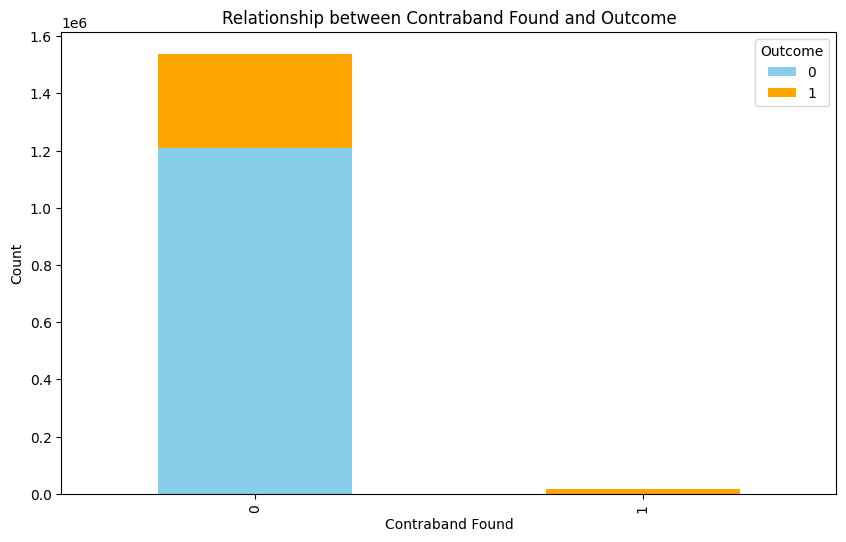

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab to show the relationship between 'contraband_found' and 'outcome'
crosstab = pd.crosstab(df['contraband_found'], df['outcome'])

# Plot the crosstab
crosstab.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'orange'])
plt.title('Relationship between Contraband Found and Outcome')
plt.xlabel('Contraband Found')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

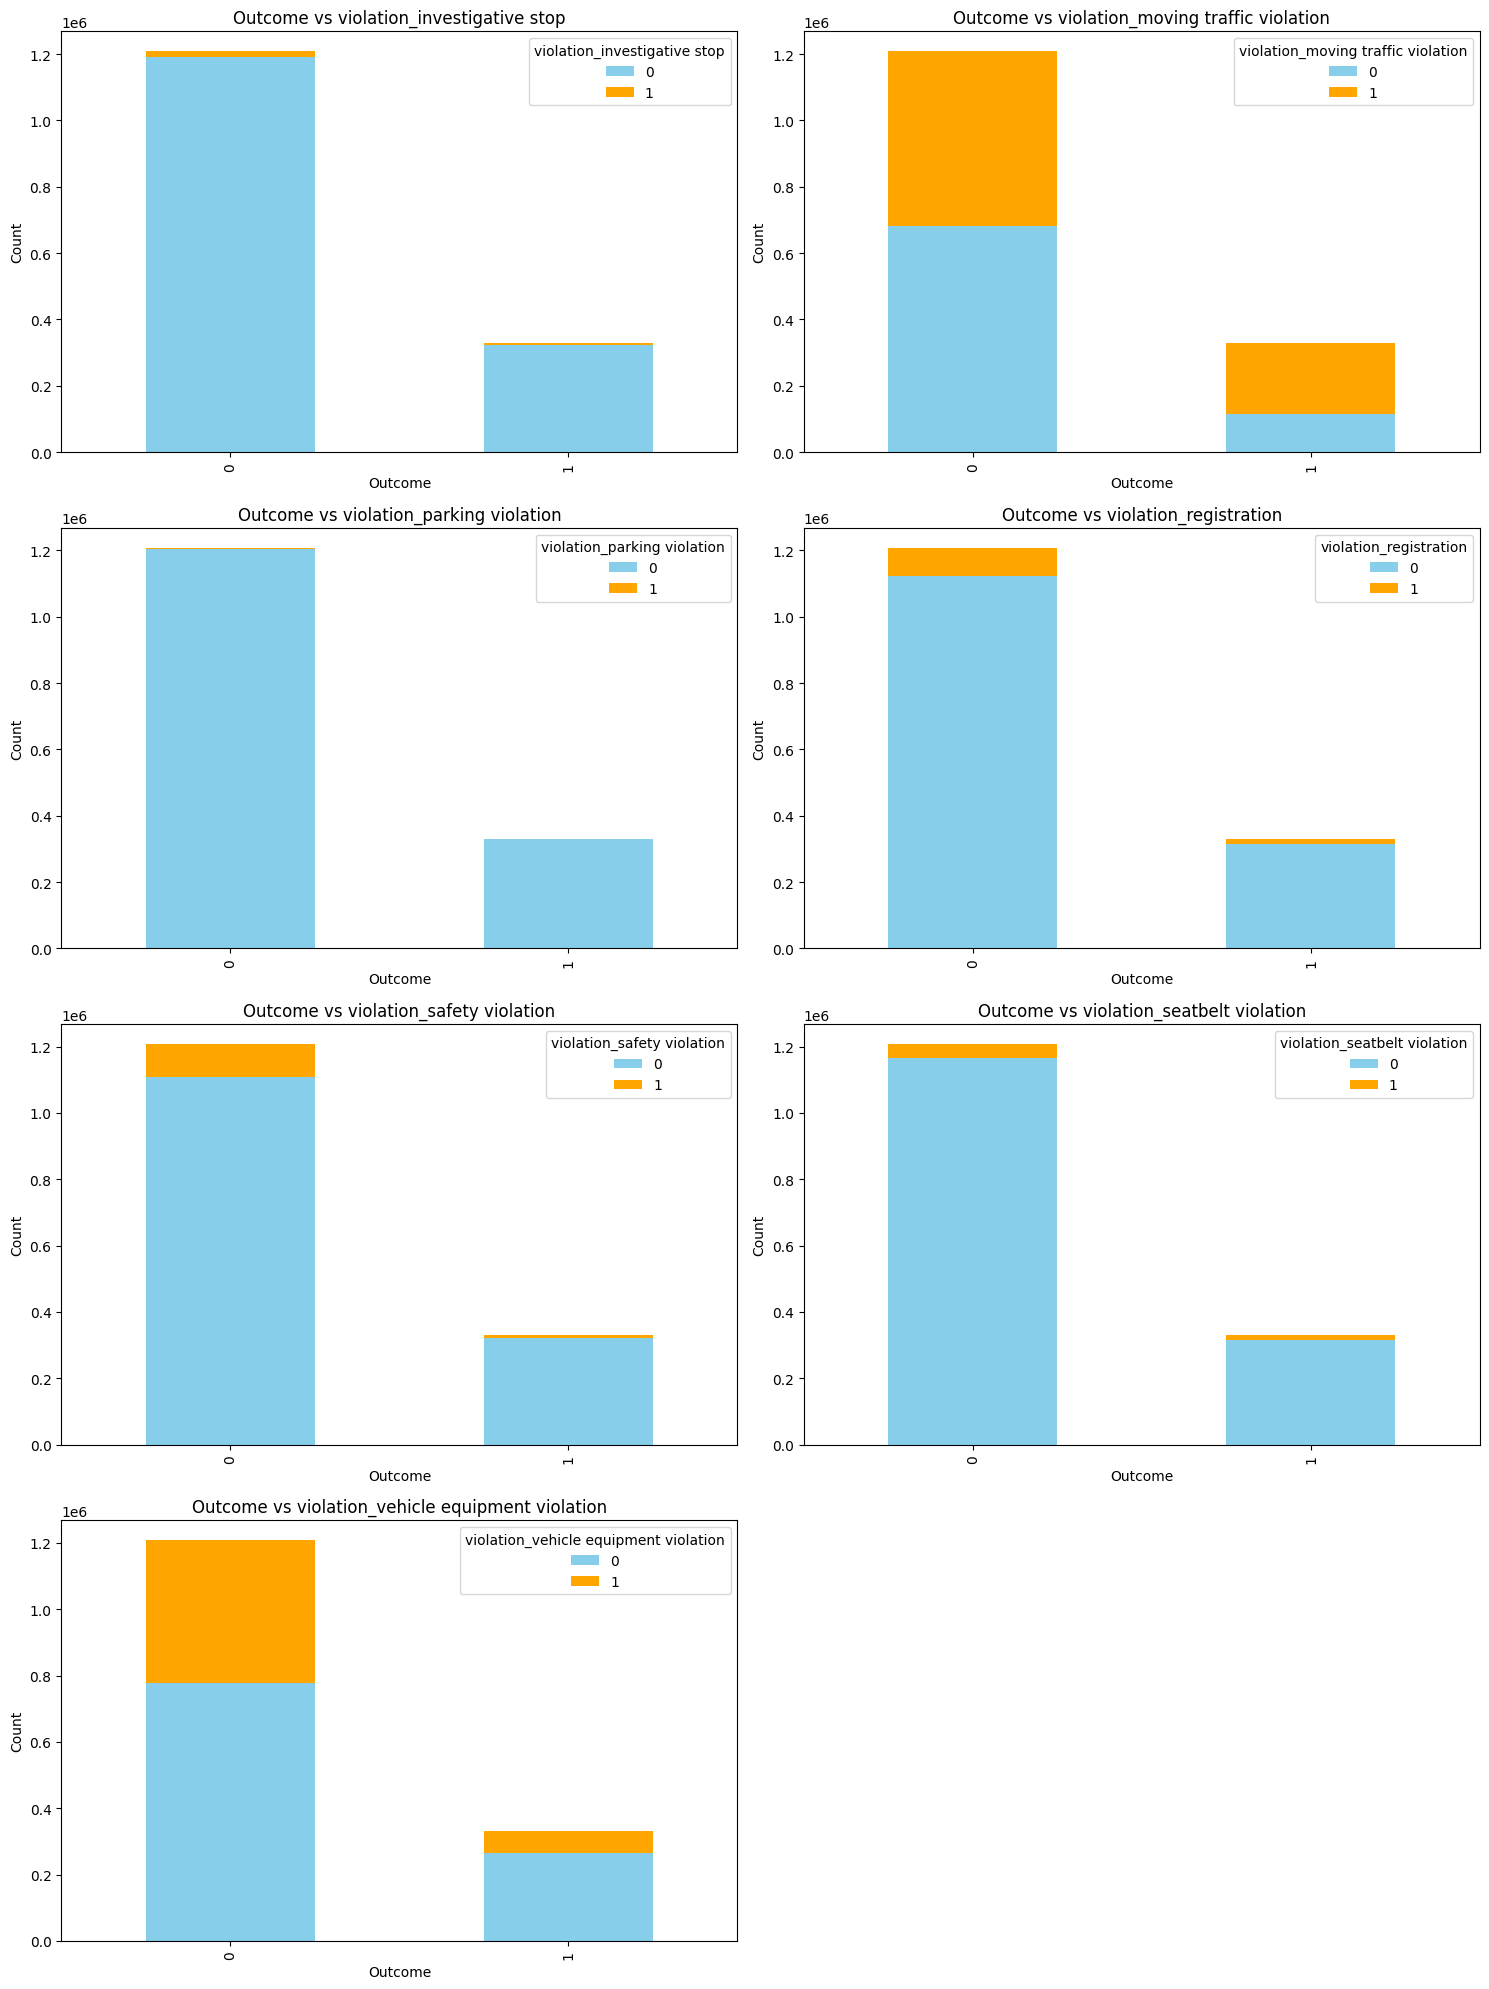

In [107]:

# List of violation columns
violation_columns = [
    'violation_investigative stop', 
    'violation_moving traffic violation', 
    'violation_parking violation', 
    'violation_registration', 
    'violation_safety violation', 
    'violation_seatbelt violation', 
    'violation_vehicle equipment violation'
]

# Create crosstabs and plot them
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(violation_columns):
    crosstab = pd.crosstab(no_contraband['outcome'], no_contraband[column])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange'])
    axes[i].set_title(f'Outcome vs {column}')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel('Count')

# Remove the last empty subplot if the number of columns is odd
if len(violation_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [103]:
no_contraband = df[df['contraband_found'] == 0]

# Investigate the outcome for those rows
outcome_counts = no_contraband['outcome'].value_counts()

# Display the counts
print(outcome_counts)

outcome
0    1208180
1     330405
Name: count, dtype: int64


In [128]:
no_contraband = no_contraband.drop(columns=['age_group'])

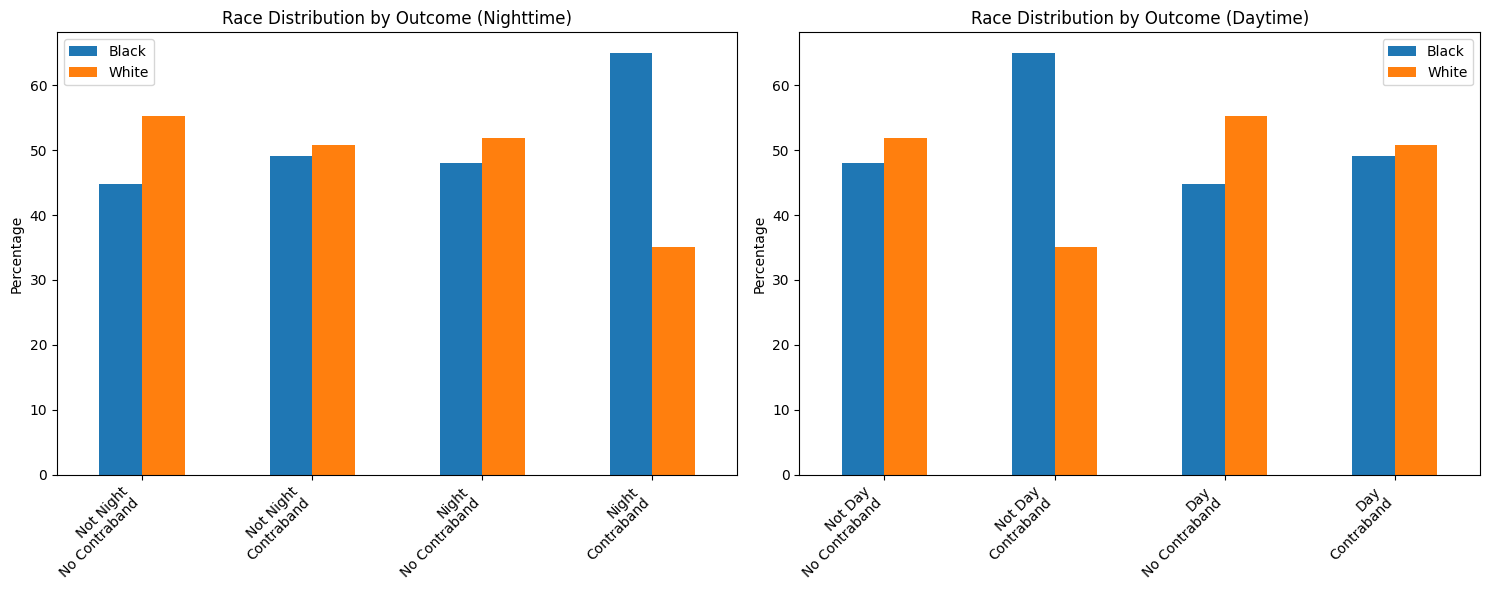

In [118]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# For nighttime data
night_data = pd.crosstab([no_contraband['time_of_day_nighttime'], 
                         no_contraband['outcome']], 
                        no_contraband['subject_race_white'], 
                        normalize='index') * 100

# For daytime data
day_data = pd.crosstab([no_contraband['time_of_day_daytime'], 
                       no_contraband['outcome']], 
                       no_contraband['subject_race_white'], 
                       normalize='index') * 100

# Create better labels
night_labels = {
    (0,0): 'Not Night\nNo Contraband',
    (0,1): 'Not Night\nContraband',
    (1,0): 'Night\nNo Contraband',
    (1,1): 'Night\nContraband'
}

day_labels = {
    (0,0): 'Not Day\nNo Contraband',
    (0,1): 'Not Day\nContraband',
    (1,0): 'Day\nNo Contraband',
    (1,1): 'Day\nContraband'
}

# Plot nighttime
night_data.plot(kind='bar', ax=ax1)
ax1.set_title('Race Distribution by Outcome (Nighttime)')
ax1.set_xlabel('')
ax1.set_ylabel('Percentage')
ax1.legend(['Black', 'White'])
ax1.set_xticklabels([night_labels[x] for x in night_data.index])

# Plot daytime
day_data.plot(kind='bar', ax=ax2)
ax2.set_title('Race Distribution by Outcome (Daytime)')
ax2.set_xlabel('')
ax2.set_ylabel('Percentage')
ax2.legend(['Black', 'White'])
ax2.set_xticklabels([day_labels[x] for x in day_data.index])

# Rotate x-axis labels
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

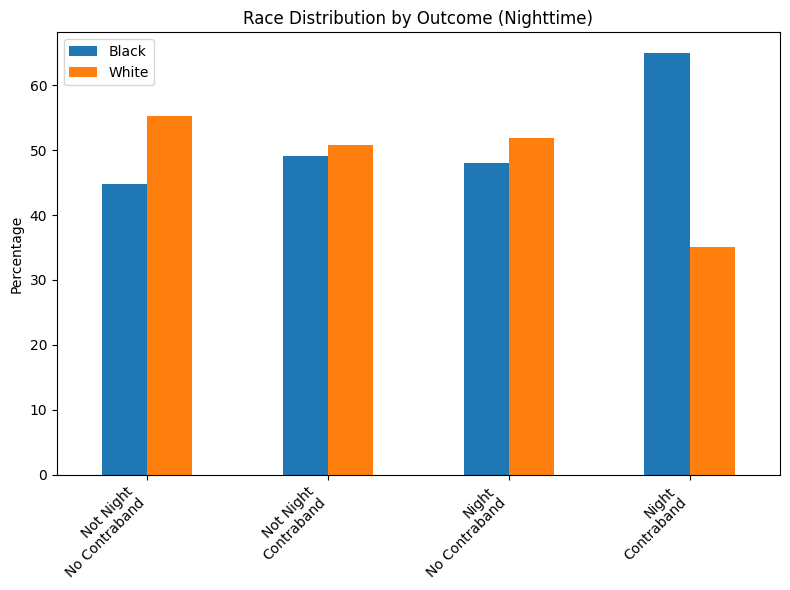

In [119]:
# Create a single figure
fig, ax = plt.subplots(figsize=(8, 6))

# For nighttime data
night_data = pd.crosstab([no_contraband['time_of_day_nighttime'], 
                         no_contraband['outcome']], 
                        no_contraband['subject_race_white'], 
                        normalize='index') * 100

# Create better labels
night_labels = {
    (0,0): 'Not Night\nNo Contraband',
    (0,1): 'Not Night\nContraband',
    (1,0): 'Night\nNo Contraband',
    (1,1): 'Night\nContraband'
}

# Plot nighttime
night_data.plot(kind='bar', ax=ax)
ax.set_title('Race Distribution by Outcome (Nighttime)')
ax.set_xlabel('')
ax.set_ylabel('Percentage')
ax.legend(['Black', 'White'])
ax.set_xticklabels([night_labels[x] for x in night_data.index])

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

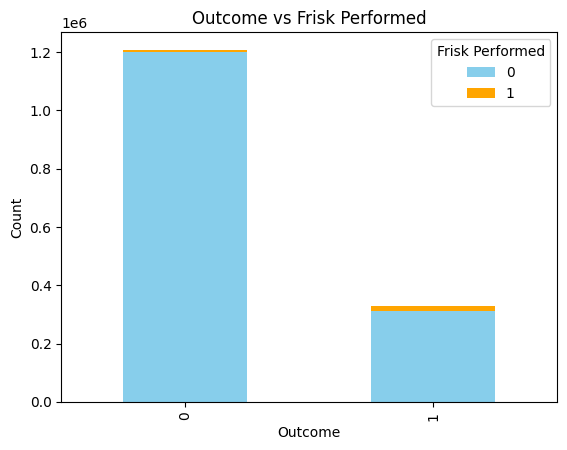

In [108]:
crosstab_frisk = pd.crosstab(no_contraband['outcome'], no_contraband['frisk_performed'])

# Plot the crosstab
plt.figure(figsize=(10, 6))
crosstab_frisk.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Outcome vs Frisk Performed')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend(title='Frisk Performed')
plt.show()

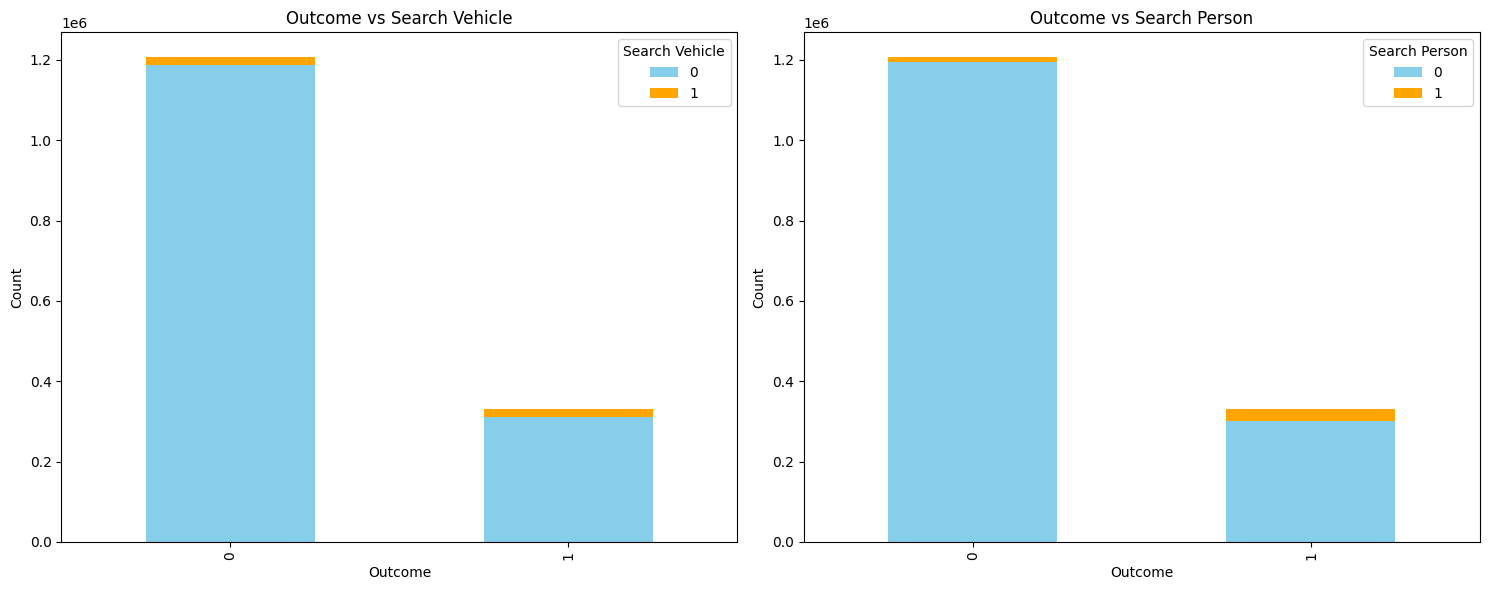

In [109]:
# Create crosstabs
crosstab_search_vehicle = pd.crosstab(no_contraband['outcome'], no_contraband['search_vehicle'])
crosstab_search_person = pd.crosstab(no_contraband['outcome'], no_contraband['search_person'])

# Plot the crosstabs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Search Vehicle plot
crosstab_search_vehicle.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'orange'])
axes[0].set_title('Outcome vs Search Vehicle')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].legend(title='Search Vehicle')

# Search Person plot
crosstab_search_person.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'orange'])
axes[1].set_title('Outcome vs Search Person')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Count')
axes[1].legend(title='Search Person')

plt.tight_layout()
plt.show()

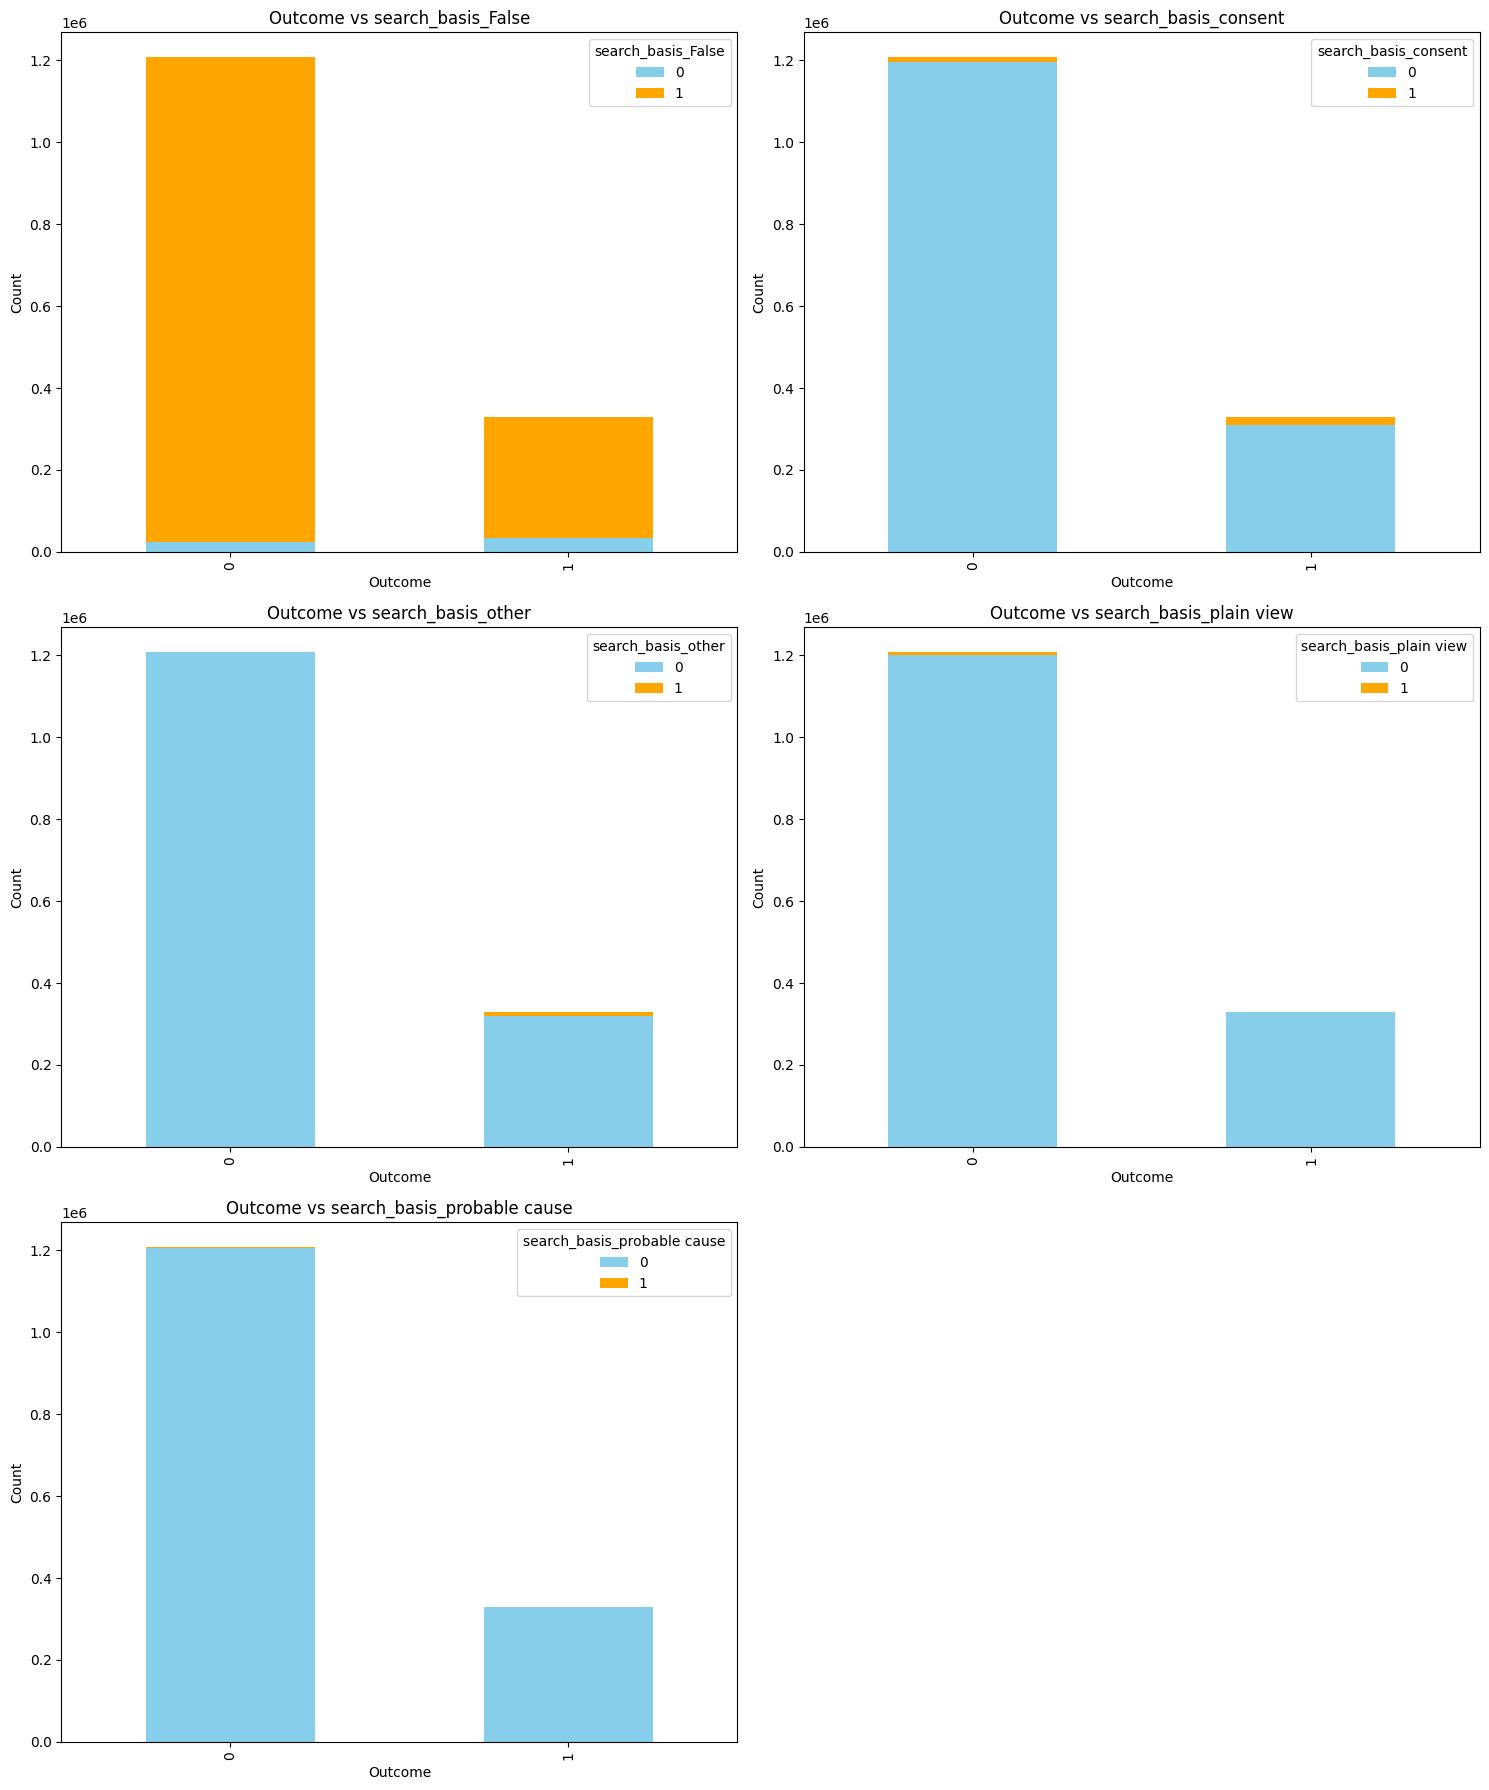

In [110]:
search_basis_columns = [
    'search_basis_False', 
    'search_basis_consent', 
    'search_basis_other', 
    'search_basis_plain view', 
    'search_basis_probable cause'
]

# Create crosstabs and plot them
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, column in enumerate(search_basis_columns):
    crosstab = pd.crosstab(no_contraband['outcome'], no_contraband[column])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange'])
    axes[i].set_title(f'Outcome vs {column}')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel('Count')

# Remove the last empty subplot if the number of columns is odd
if len(search_basis_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

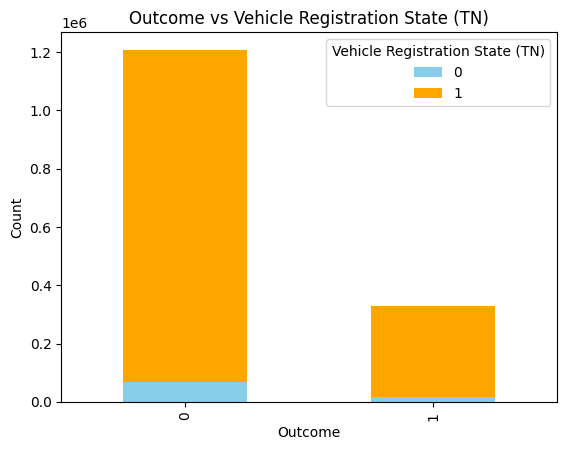

In [120]:
crosstab_vehicle_registration = pd.crosstab(no_contraband['outcome'], no_contraband['vehicle_registration_state_TN'])

# Plot the crosstab
plt.figure(figsize=(10, 6))
crosstab_vehicle_registration.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Outcome vs Vehicle Registration State (TN)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend(title='Vehicle Registration State (TN)')
plt.show()

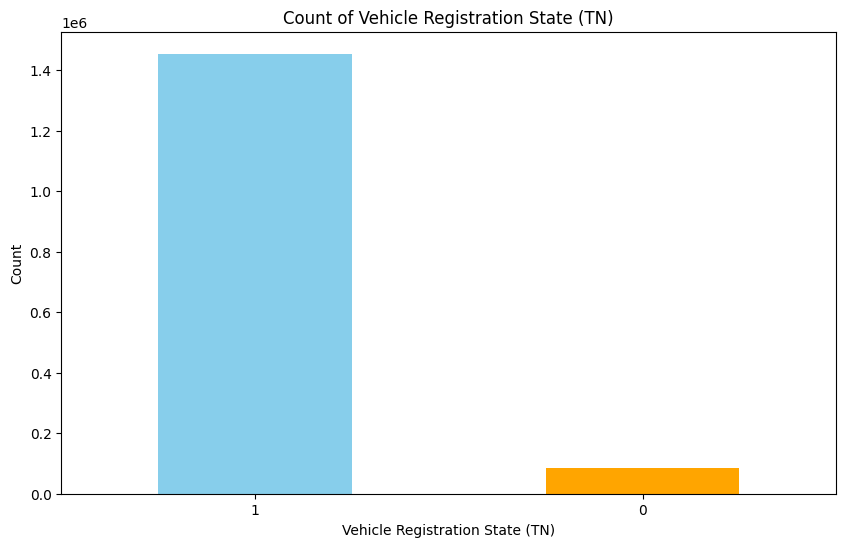

In [121]:
vehicle_registration_counts = no_contraband['vehicle_registration_state_TN'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
vehicle_registration_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of Vehicle Registration State (TN)')
plt.xlabel('Vehicle Registration State (TN)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [106]:
df['search_conducted_vehicle'] = df['search_vehicle'] * df['search_conducted']
df['search_conducted_person'] = df['search_person'] * df['search_conducted'] 

# Create meta-data dataframe

In [168]:
df_meta = df[[
    'precinct', 'outcome',
    'day_of_week_Friday','day_of_week_Monday','day_of_week_Saturday', 'day_of_week_Thursday',
    'day_of_week_Tuesday','day_of_week_Wednesday', 'time_of_day_nighttime',
    'subject_sex_male', 'subject_race_asian/pacific islander', 'subject_race_black', 'subject_race_hispanic', 
    'subject_race_other', 'subject_race_unknown', 'subject_race_white', 'subject_age',
    'violation_investigative stop', 'violation_moving traffic violation', 'violation_parking violation', 
    'violation_registration', 'violation_safety violation', 'violation_seatbelt violation', 
    'violation_vehicle equipment violation', 'raw_search_warrant', 'raw_search_inventory', 
    'contraband_found', 
    'frisk_performed','search_conducted_vehicle', 'search_conducted_person',
    'search_basis_False', 'search_basis_consent', 'search_basis_other', 
    'search_basis_plain view', 'search_basis_probable cause', 
    'vehicle_registration_state_TN'
    ]]

# dropped columns


# contraband 'contraband_drugs', 'contraband_weapons', 
# 'time_of_day_daytime', 'vehicle_registration_state_not TN'
# 'raw_search_plain_view', 'subject_sex_female',

df_meta.head(10)

,precinct,outcome,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_nighttime,subject_sex_male,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_age,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,raw_search_warrant,raw_search_inventory,contraband_found,frisk_performed,search_conducted_vehicle,search_conducted_person,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,vehicle_registration_state_TN
0,8,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,30,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,31,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1
3,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
4,6,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,29,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
5,6,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,18,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,36,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
7,4,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,31,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1
8,5,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,25,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
9,8,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,40,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


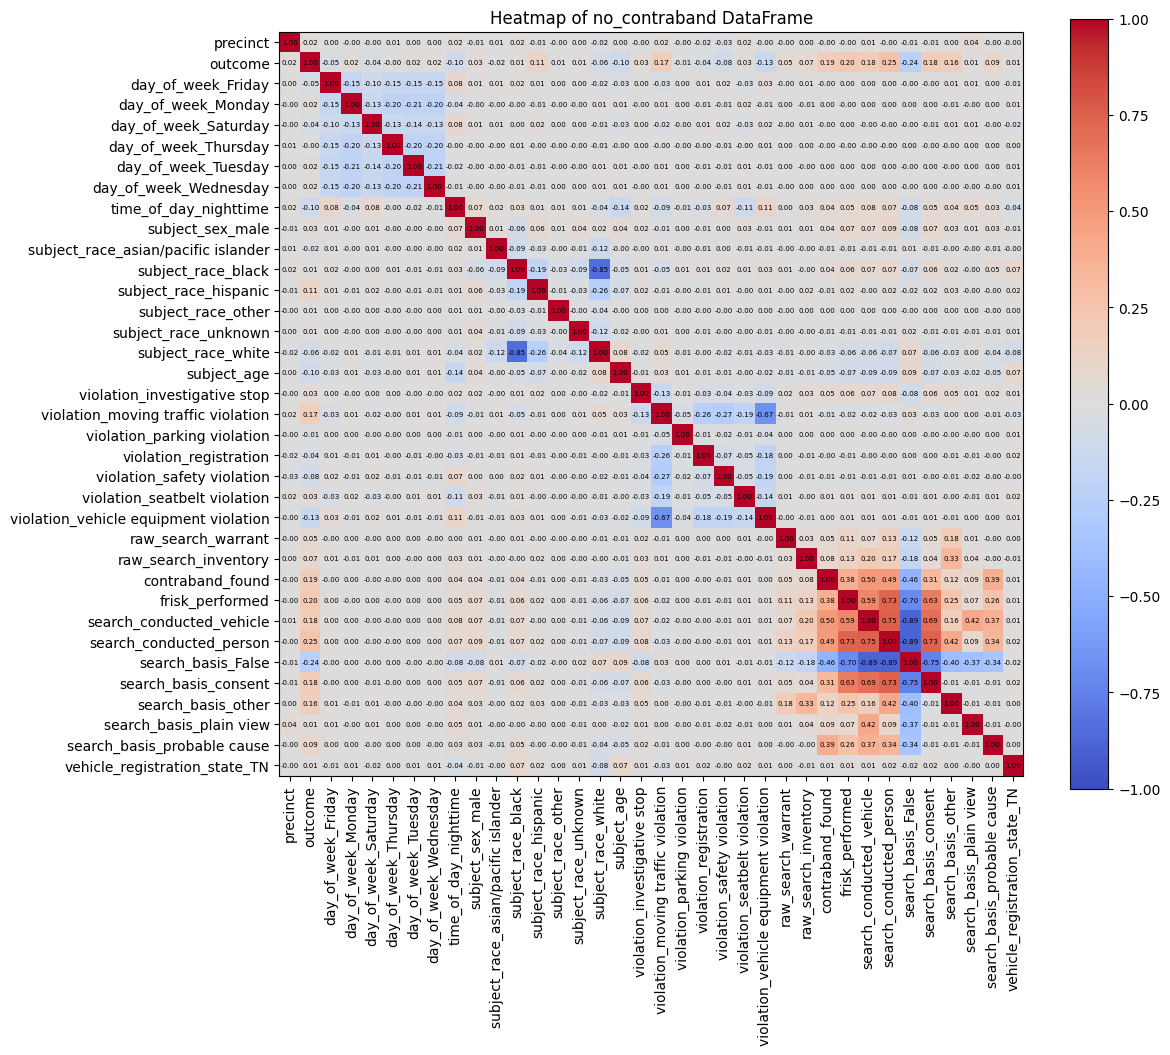

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = df_meta.corr()

# Plot heatmap using plt
plt.figure(figsize=(12, 10))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)

# Add labels
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Add correlation numbers
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black',fontsize=5)

# Add title
plt.title('Heatmap of no_contraband DataFrame')

plt.show()

In [170]:
df_meta['search_intensity'] = df_meta['search_conducted_person'] + df_meta['search_conducted_vehicle']
df_meta = df_meta.drop(columns=['search_conducted_person', 'search_conducted_vehicle'])
df_meta['total_enforcement_intensity'] = df_meta['search_intensity'] + 0.5 * df['frisk_performed']
df_meta = df_meta.drop(columns=['search_intensity', 'frisk_performed'])


/var/folders/m2/b_qd00912hg07bdfxg73hd3h0000gn/T/ipykernel_74958/3487789729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['search_intensity'] = df_meta['search_conducted_person'] + df_meta['search_conducted_vehicle']


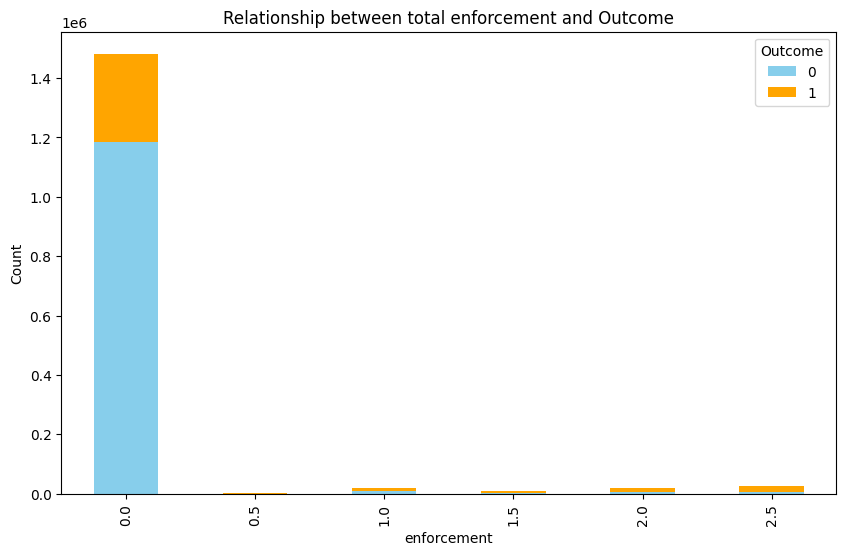

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab to show the relationship between 'contraband_found' and 'outcome'
crosstab = pd.crosstab(df_meta['total_enforcement_intensity'], df_meta['outcome'])

# Plot the crosstab
crosstab.plot(kind='bar', figsize=(10, 6), stacked=True, color=['skyblue', 'orange'])
plt.title('Relationship between total enforcement and Outcome')
plt.xlabel('enforcement')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

In [148]:
df_meta['total_enforcement_intensity'].unique()


array([0. , 1.5, 1. , 2. , 2.5, 0.5])

# Scaling

In [171]:
df_meta.head()

,precinct,outcome,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_nighttime,subject_sex_male,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_age,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,raw_search_warrant,raw_search_inventory,contraband_found,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,vehicle_registration_state_TN,total_enforcement_intensity
0,8,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.0
1,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,30,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.5
2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,31,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1.5
3,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,27,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1.0
4,6,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,29,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1.0


In [64]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()
df_meta.loc[:, 'subject_age'] = scaler.fit_transform(df_meta[['subject_age']])

In [173]:
df_meta
#['subject_age']

,precinct,outcome,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_nighttime,subject_sex_male,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_age,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,raw_search_warrant,raw_search_inventory,contraband_found,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,vehicle_registration_state_TN,total_enforcement_intensity
0,8,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,-0.356820,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0.0
1,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,-0.499268,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.5
2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,-0.428044,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1.5
3,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,-0.712940,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1.0
4,6,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,-0.570492,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554905,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1.138883,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0
1554906,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.207242,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0
1554907,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,-0.641716,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.0
1554908,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2.136018,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0


In [174]:
df_meta = pd.get_dummies(df_meta, columns=['precinct'], drop_first=True)
df_meta = pd.get_dummies(df_meta, columns=['total_enforcement_intensity'], prefix='serch_intensity')
df_meta

,outcome,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_nighttime,subject_sex_male,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_other,subject_race_unknown,subject_race_white,subject_age,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,raw_search_warrant,raw_search_inventory,contraband_found,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,vehicle_registration_state_TN,precinct_2,precinct_3,precinct_4,precinct_5,precinct_6,precinct_7,precinct_8,serch_intensity_0.0,serch_intensity_0.5,serch_intensity_1.0,serch_intensity_1.5,serch_intensity_2.0,serch_intensity_2.5
0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,-0.356820,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,False,False,False,False,False,False,True,True,False,False,False,False,False
1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,-0.499268,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,False,False,False,False,False,False,True,False,False,False,True,False,False
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,-0.428044,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,-0.712940,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False
4,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,-0.570492,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,False,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554905,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1.138883,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,True,False,False,False,False,False,False,True,False,False,False,False,False
1554906,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.207242,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,False,False,False,False,False,False,False,True,False,False,False,False,False
1554907,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,-0.641716,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,False,False,False,False,False,False,False,True,False,False,False,False,False
1554908,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2.136018,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,False,False,False,False,False,False,True,False,False,False,False,False


In [175]:
# Identify columns that start with "precinct_"
precinct_columns = [col for col in df_meta.columns if col.startswith('precinct_')]
intensity_columns = [col for col in df_meta.columns if col.startswith('intensity_')]

# Convert only these columns from True/False to 0/1
df_meta[precinct_columns] = df_meta[precinct_columns].astype(int)
df_meta[intensity_columns] = df_meta[intensity_columns].astype(int)


In [158]:
df_meta.head()

,outcome,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_nighttime,subject_sex_male,violation_investigative stop,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,raw_search_warrant,raw_search_inventory,contraband_found,search_basis_False,search_basis_consent,search_basis_other,search_basis_plain view,search_basis_probable cause,vehicle_registration_state_TN,precinct_2,precinct_3,precinct_4,precinct_5,precinct_6,precinct_7,precinct_8,intensity_0.0,intensity_0.5,intensity_1.0,intensity_1.5,intensity_2.0,intensity_2.5
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


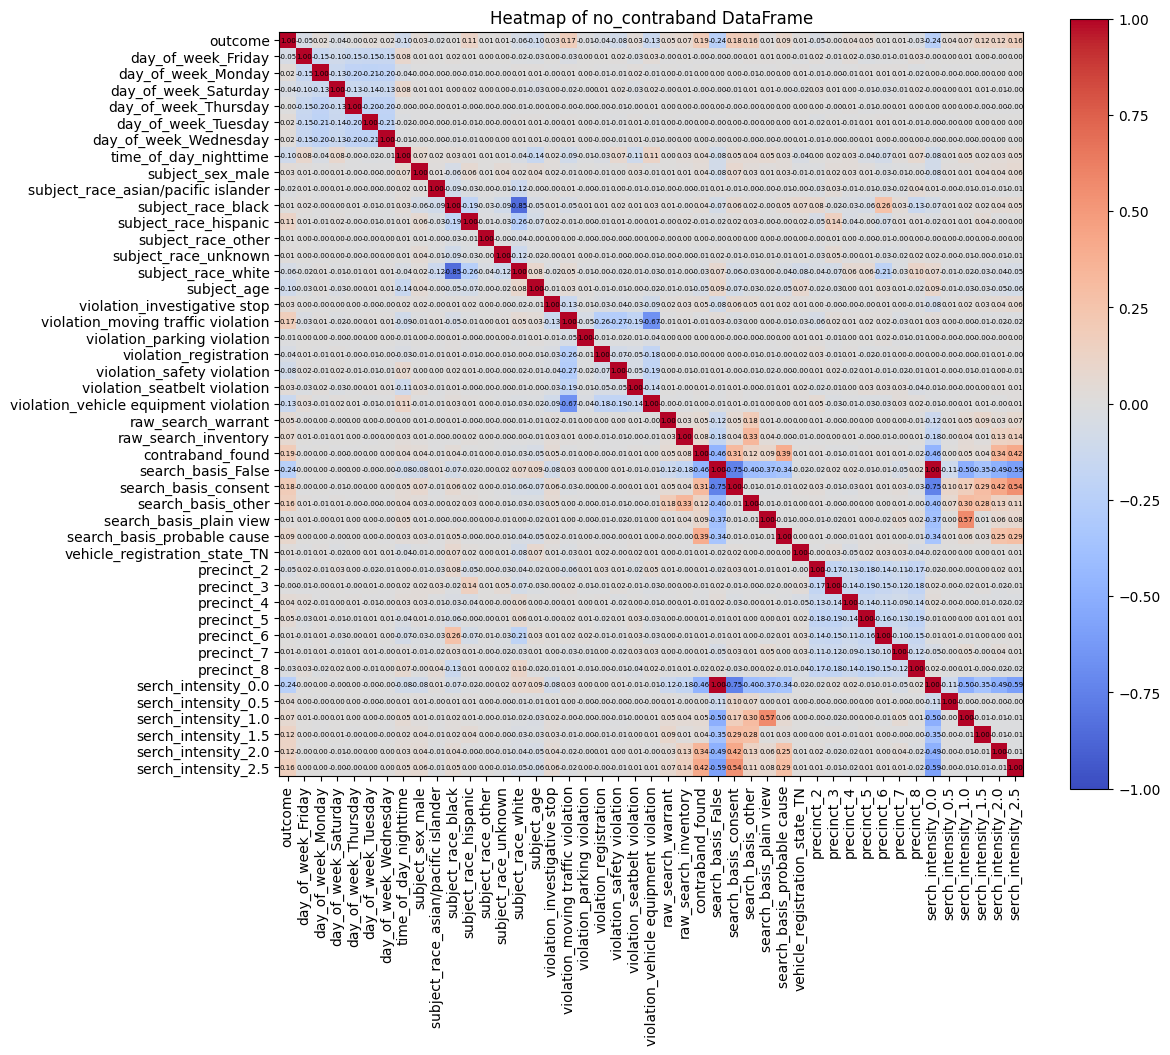

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = df_meta.corr()

# Plot heatmap using plt
plt.figure(figsize=(12, 10))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)

# Add labels
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

# Add correlation numbers
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black',fontsize=5)

# Add title
plt.title('Heatmap of no_contraband DataFrame')

plt.show()

# Baseline with meta data only

In [36]:
from sklearn.model_selection import train_test_split

In [177]:
X = df_meta.drop(columns=['outcome'])
y = df_meta['outcome']

# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [186]:
# Define model architecture

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


np.random.seed(42)
tf.random.set_seed(42)

X_train = X_train.astype(float)
y_train = y_train.astype(float)

model = Sequential([
    Dense(128, activation="relu", kernel_initializer="lecun_normal", input_shape=(X_train.shape[1],)),
    Dense(64, activation="relu", kernel_initializer="lecun_normal"),
    Dense(32, activation="relu", kernel_initializer="lecun_normal"),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/100
23324/23324 [==============================] - 35s 1ms/step - loss: 0.4490 - accuracy: 0.7999 - val_loss: 0.4475 - val_accuracy: 0.8002
Epoch 2/100
23324/23324 [==============================] - 32s 1ms/step - loss: 0.4457 - accuracy: 0.8013 - val_loss: 0.4479 - val_accuracy: 0.8007
Epoch 3/100
23324/23324 [==============================] - 35s 2ms/step - loss: 0.4448 - accuracy: 0.8016 - val_loss: 0.4464 - val_accuracy: 0.8005
Epoch 4/100
23324/23324 [==============================] - 33s 1ms/step - loss: 0.4442 - accuracy: 0.8019 - val_loss: 0.4462 - val_accuracy: 0.8006
Epoch 5/100
23324/23324 [==============================] - 34s 1ms/step - loss: 0.4437 - accuracy: 0.8021 - val_loss: 0.4468 - val_accuracy: 0.8005
Epoch 6/100
23324/23324 [==============================] - 36s 2ms/step - loss: 0.4433 - accuracy: 0.8023 - val_loss: 0.4463 - val_accuracy: 0.8005
Epoch 7/100
23324/23324 [==============================] - 35s 1ms/step - loss: 0.4430 - accuracy: 0.8025 - val_

In [19]:
from sklearn.metrics import accuracy_score

In [188]:
X_test = X_test.astype(float)
y_test = y_test.astype(float)

train_score = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {train_score[0]}, Train Accuracy: {train_score[1]}")
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_score[0]}, Test Accuracy: {test_score[1]}")


Train Loss: 0.44248607754707336, Train Accuracy: 0.8028160333633423
Test Loss: 0.44541865587234497, Test Accuracy: 0.8012810945510864


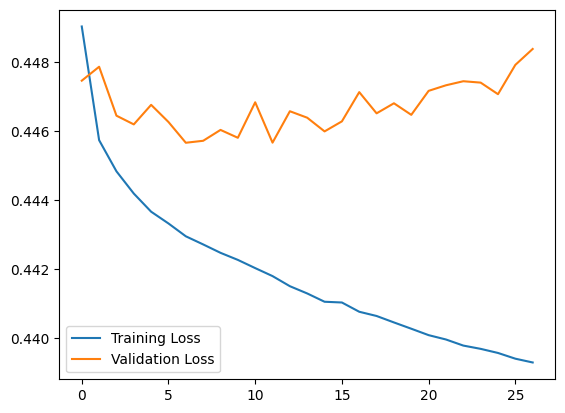

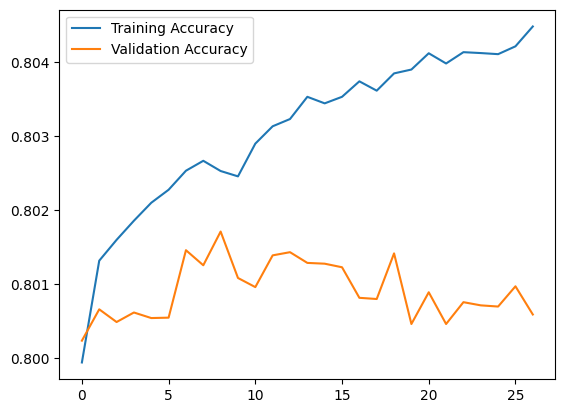

In [190]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


MaxWeight Ranking:
1. contraband_found: 3.8747
2. search_basis_other: 3.1628
3. raw_search_warrant: 2.6567
4. day_of_week_Friday: 2.4573
5. precinct_6: 2.3090
6. raw_search_inventory: 2.3039
7. precinct_8: 2.3002
8. violation_registration: 2.2812
9. day_of_week_Saturday: 2.2408
10. violation_safety violation: 2.2332
11. precinct_3: 2.2062
12. violation_investigative stop: 2.0726
13. search_basis_consent: 2.0314
14. serch_intensity_1.5: 2.0195
15. search_basis_plain view: 1.9934
16. day_of_week_Monday: 1.9711
17. time_of_day_nighttime: 1.9175
18. serch_intensity_1.0: 1.8690
19. serch_intensity_0.5: 1.8625
20. serch_intensity_2.5: 1.8425
21. precinct_4: 1.7819
22. precinct_5: 1.7636
23. vehicle_registration_state_TN: 1.7576
24. precinct_7: 1.7520
25. violation_parking violation: 1.7138
26. subject_race_white: 1.6912
27. violation_seatbelt violation: 1.6753
28. serch_intensity_2.0: 1.6356
29. subject_race_unknown: 1.5980
30. violation_vehicle equipment violation: 1.5566
31. subject_sex_ma

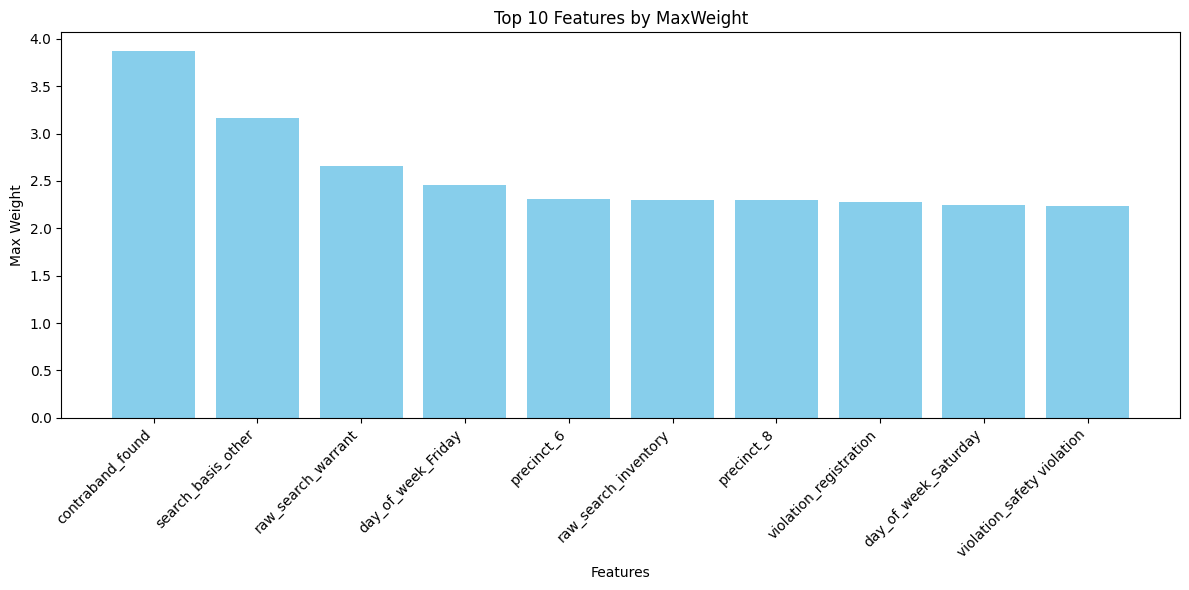

In [195]:
import numpy as np
import matplotlib.pyplot as plt

def get_maxweight_ranking(model, feature_names):
    # Get the weights of the first layer
    first_layer_weights = model.layers[0].get_weights()[0]

    # Calculate the absolute values of weights
    abs_weights = np.abs(first_layer_weights)

    # Get the maximum weight for each input feature
    max_weights = np.max(abs_weights, axis=1)

    # Create a list of (feature, max_weight) tuples
    feature_weights = list(zip(feature_names, max_weights))

    # Sort the list by max_weight in descending order
    ranked_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

    return ranked_features

# Assuming your model is already defined and trained
# model = ...

# List of your feature names
feature_names = X_train.columns.tolist()  # Replace with your actual feature names

# Get the MaxWeight ranking
maxweight_ranking = get_maxweight_ranking(model, feature_names)

# Print the ranking
print("MaxWeight Ranking:")
for rank, (feature, weight) in enumerate(maxweight_ranking, 1):
    print(f"{rank}. {feature}: {weight:.4f}")

# Optionally, create a bar plot of the top N features
def plot_top_features(ranking, top_n=10):
    top_features = ranking[:top_n]
    features, weights = zip(*top_features)

    plt.figure(figsize=(12, 6))
    plt.bar(features, weights, color='skyblue')
    plt.title(f"Top {top_n} Features by MaxWeight")
    plt.xlabel("Features")
    plt.ylabel("Max Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot top 10 features
plot_top_features(maxweight_ranking, top_n=10)

# Feature Selection: Mutual Information

In [42]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)

In [162]:
# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

                                  Feature  Mutual Information
18                     search_basis_False            0.186788
31                          intensity_0.0            0.185327
23          vehicle_registration_state_TN            0.165556
7                        subject_sex_male            0.110011
9      violation_moving traffic violation            0.095616
14  violation_vehicle equipment violation            0.057899
6                   time_of_day_nighttime            0.038570
17                       contraband_found            0.014178
19                   search_basis_consent            0.013293
27                             precinct_5            0.011746
4                     day_of_week_Tuesday            0.011444
1                      day_of_week_Monday            0.011147
5                   day_of_week_Wednesday            0.011045
20                     search_basis_other            0.010781
3                    day_of_week_Thursday            0.010686
36      

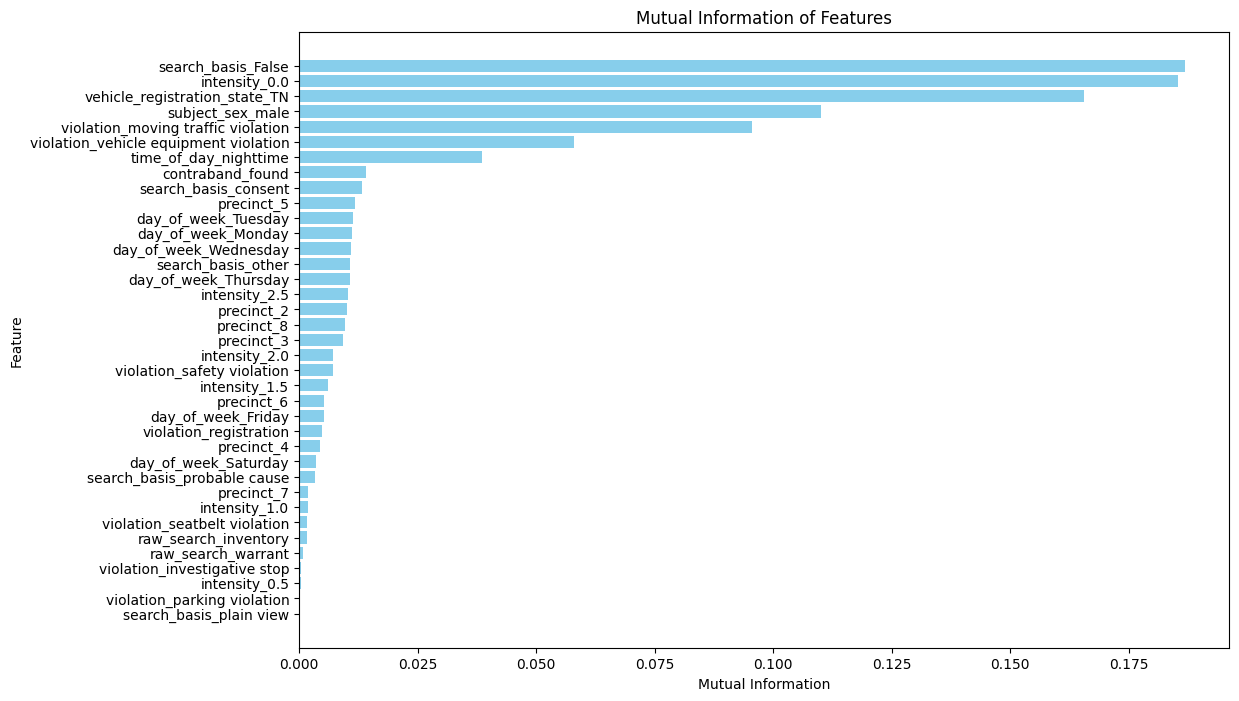

In [163]:
import matplotlib.pyplot as plt

# Create bar plot
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information of Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.show()

# Feature Selection: RF

In [179]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
sorted_importances = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)
print(sorted_importances)


[('subject_age', 0.42563555331540553), ('violation_moving traffic violation', 0.05337848557245915), ('search_basis_False', 0.04493513359137258), ('time_of_day_nighttime', 0.04212549388173479), ('serch_intensity_0.0', 0.03878728444789617), ('contraband_found', 0.032589761729401506), ('subject_race_hispanic', 0.024781785182201765), ('violation_vehicle equipment violation', 0.024684736562271044), ('search_basis_consent', 0.023930332861123844), ('search_basis_other', 0.02151747168820875), ('subject_sex_male', 0.020445612348667833), ('precinct_4', 0.01615082481684944), ('day_of_week_Friday', 0.015112598243973293), ('precinct_5', 0.01334770135469825), ('day_of_week_Saturday', 0.013210084729697515), ('vehicle_registration_state_TN', 0.0121811954175365), ('violation_safety violation', 0.011461921039699561), ('day_of_week_Thursday', 0.010535911984661387), ('serch_intensity_2.5', 0.01028019541575839), ('subject_race_white', 0.010128201577355611), ('day_of_week_Tuesday', 0.010082176890883716), ('

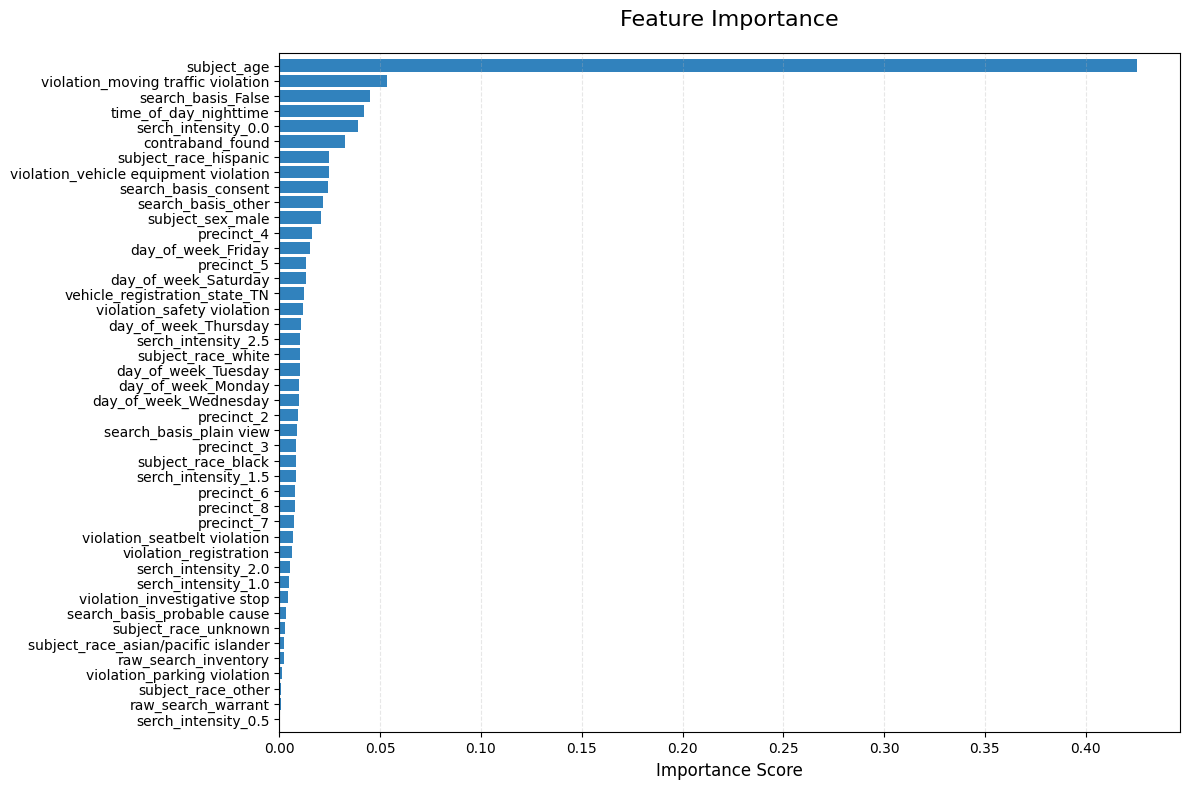

In [180]:
# Since sorted_importances is already a list of tuples with (feature, value)
df_importance = pd.DataFrame(sorted_importances, columns=['feature', 'importance'])

# Or if you want to split the combined feature names (like 'time_of_day_nighttime')
# You can clean up the feature names too
df_importance = pd.DataFrame(sorted_importances, columns=['feature', 'importance'])

# If you want to format the importance values to be more readable
df_importance['importance'] = df_importance['importance'].round(4)  # rounds to 4 decimal places

# Make the figure taller to give more vertical space between labels
# Create figure
plt.figure(figsize=(12, 8))

# Create horizontal bar plot directly with plt.barh()
plt.barh(df_importance['feature'], 
         df_importance['importance'], 
         color='#3182bd')

# Customize the plot
plt.title('Feature Importance', fontsize=16, pad=20)
plt.xlabel('Importance Score', fontsize=12)

# Add grid lines
plt.grid(True, axis='x', linestyle='--', alpha=0.3)

# Invert y-axis to have highest values on top
plt.gca().invert_yaxis()

# Adjust margins for better spacing
plt.margins(y=0.01)  # Reduce vertical margins

# Make sure all labels are visible
plt.tight_layout()

plt.show()

# Random EDA

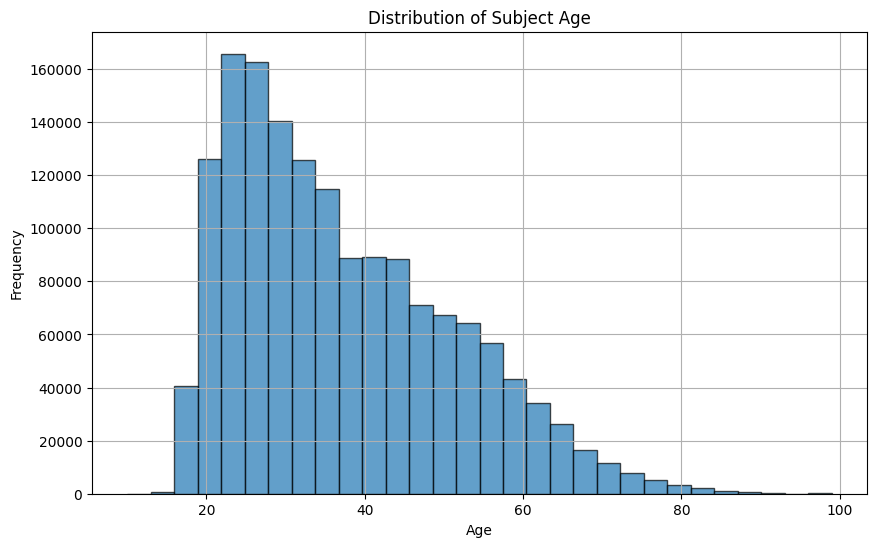

In [59]:
import matplotlib.pyplot as plt

# Histogram of subject_age
plt.figure(figsize=(10, 6))
plt.hist(df['subject_age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Subject Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
correlation = df[['subject_age', 'outcome']].corr()
print(correlation)

             subject_age   outcome
subject_age     1.000000 -0.095052
outcome        -0.095052  1.000000


outcome           0       1
age_group                  
Teen          29875   11236
Young Adult  443883  150807
Middle-aged  485291  138925
Senior       224008   42974
Elderly       25568    2343


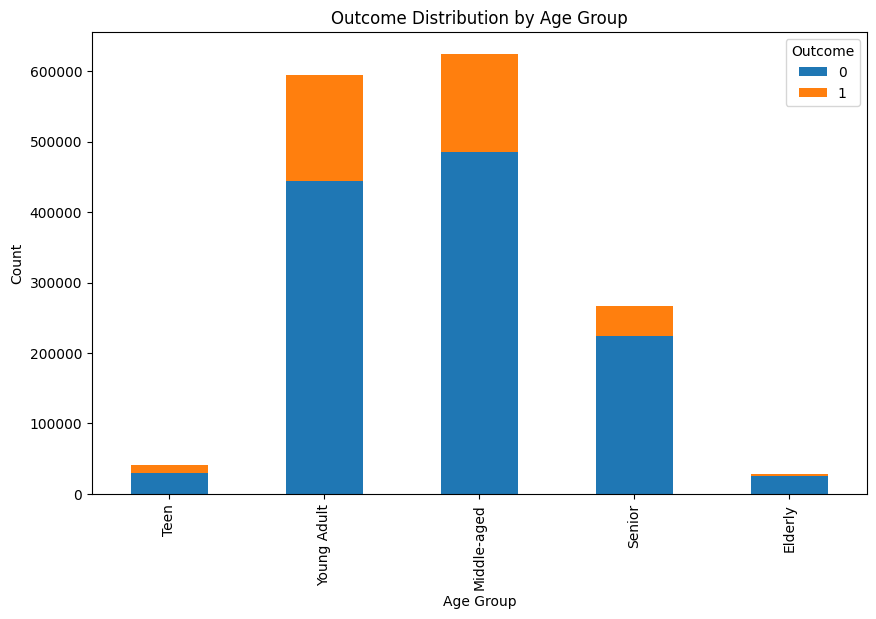

In [62]:
# Create age bins
df['age_group'] = pd.cut(df['subject_age'], bins=[0, 18, 30, 50, 70, 100], labels=['Teen', 'Young Adult', 'Middle-aged', 'Senior', 'Elderly'])

# Count outcomes by age group
age_outcome = df.groupby(['age_group', 'outcome']).size().unstack()
print(age_outcome)

# Visualize the association
age_outcome.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()


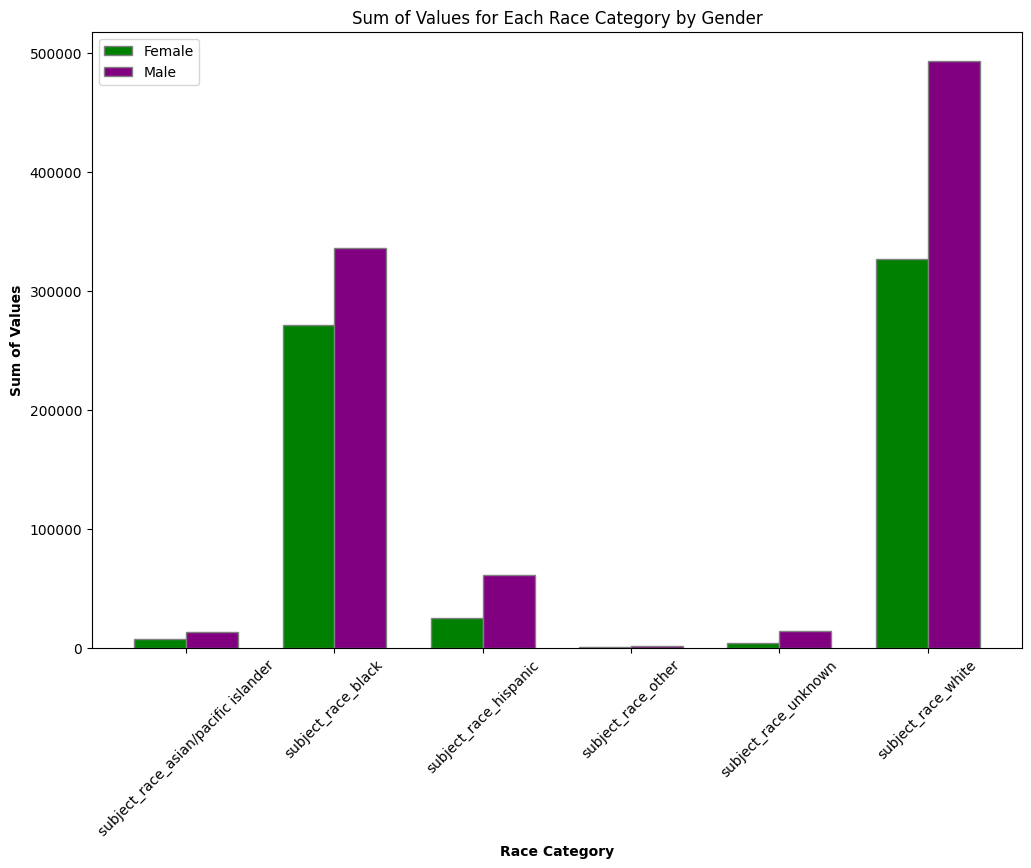

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# List of race columns
race_columns = ['subject_race_asian/pacific islander', 'subject_race_black', 'subject_race_hispanic', 
                'subject_race_other', 'subject_race_unknown', 'subject_race_white']

# List of gender columns
gender_columns = ['subject_sex_female', 'subject_sex_male']

# Create a DataFrame to hold the sums
data = {
    'Race': race_columns,
    'Female': df[race_columns].multiply(df['subject_sex_female'], axis=0).sum(),
    'Male': df[race_columns].multiply(df['subject_sex_male'], axis=0).sum()
}

# Convert to DataFrame
plot_df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(plot_df['Race']))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, plot_df['Female'], color='green', width=bar_width, edgecolor='grey', label='Female')
ax.bar(r2, plot_df['Male'], color='purple', width=bar_width, edgecolor='grey', label='Male')

# Add labels
ax.set_xlabel('Race Category', fontweight='bold')
ax.set_ylabel('Sum of Values', fontweight='bold')
ax.set_title('Sum of Values for Each Race Category by Gender')
ax.set_xticks([r + bar_width/2 for r in range(len(plot_df['Race']))])
ax.set_xticklabels(plot_df['Race'], rotation=45)

# Add legend
ax.legend()

# Show plot
plt.show()